In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

# Define the model name
# NAME = 'vae_van_mnist_2latd_5ep_bat100_mse_100_50_25_12'

# Download data
from src.data.mnist.load_mnist_data import load_mnist_data
(x_train, y_train), (x_test, y_test) = load_mnist_data()

### Create and train the model

In [2]:
# Create VAE and fit it
from src.models.vae_vanilla import VaeVanilla
vae = VaeVanilla(input_shape=x_train.shape[1:],
                 hidden_layers_nodes=[192, 96, 48, 24, 12, 6],
                 latent_space_dim=2,
                 loss_type='bce',
                 beta=0.00013  # best beta in the file C:\Users\alexi\Documents\All\ETH_UZH\MasterThesis\_MT_Vol_cube\code_my\autoencoder_library\tests
                 )
vae.compile(optimizer='adam')
history = vae.fit(x_train, 
                 epochs=150, 
                 batch_size=64,
                 validation_data=x_test
                 )


Epoch 1/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - kl_loss: 0.0012 - reconstruction_loss: 0.0749 - total_loss: 0.0761 - val_kl_loss: 8.6978e-04 - val_reconstruction_loss: 0.0495 - val_total_loss: 0.0504
Epoch 2/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 8.7931e-04 - reconstruction_loss: 0.0481 - total_loss: 0.0490 - val_kl_loss: 9.4677e-04 - val_reconstruction_loss: 0.0444 - val_total_loss: 0.0453
Epoch 3/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - kl_loss: 9.7253e-04 - reconstruction_loss: 0.0440 - total_loss: 0.0450 - val_kl_loss: 0.0010 - val_reconstruction_loss: 0.0425 - val_total_loss: 0.0435
Epoch 4/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - kl_loss: 0.0010 - reconstruction_loss: 0.0418 - total_loss: 0.0428 - val_kl_loss: 0.0010 - val_reconstruction_loss: 0.0404 - val_total_loss: 0.0414
Epoch 5/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - kl_loss: 0.0010 - reconstruction_loss: 0.0405 - total_loss: 0.0415 - val_kl_loss: 0.0011 - val_reconstruction_loss: 

### Save the model

In [3]:
# from utils.save_model_and_history import save_model
# save_model(vae, folder=NAME)

### Load the model

In [4]:
# from utils.load_model_and_history import load_model
# vae_ = load_model(NAME)

### Plot history of losses

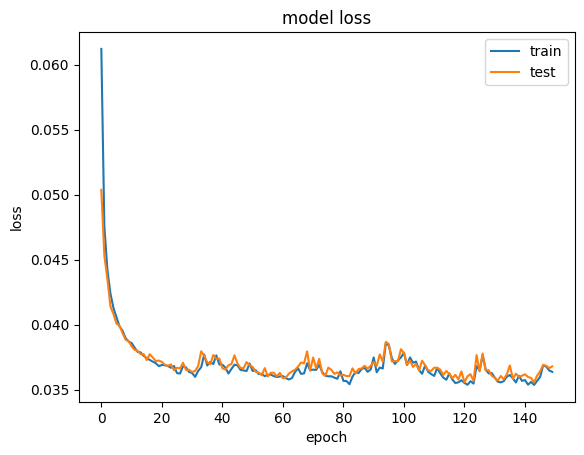

In [5]:
from src.visualization.plot_history_of_losses import plot_history_of_losses
plot_history_of_losses(history)

### Plot true vs prediction images

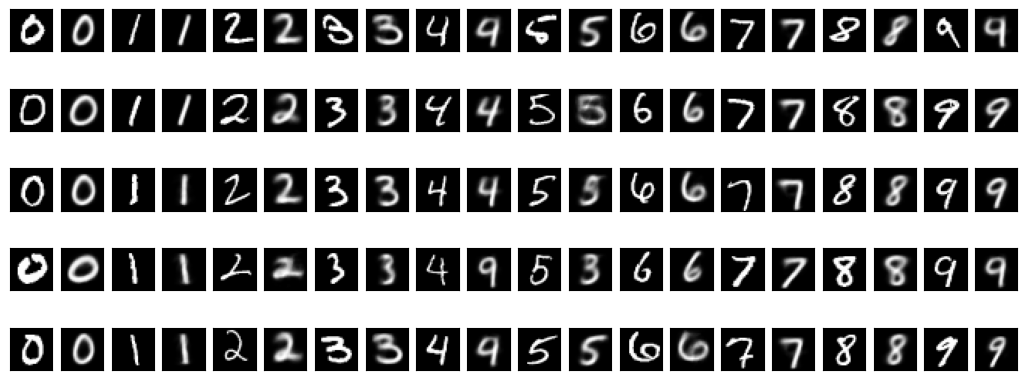

In [6]:
from src.visualization.mnist.plot_true_vs_prediction_images import plot_true_vs_prediction_images
plot_true_vs_prediction_images(vae, 
                               x_test,
                               y_test)

### Plot 2d latent space values

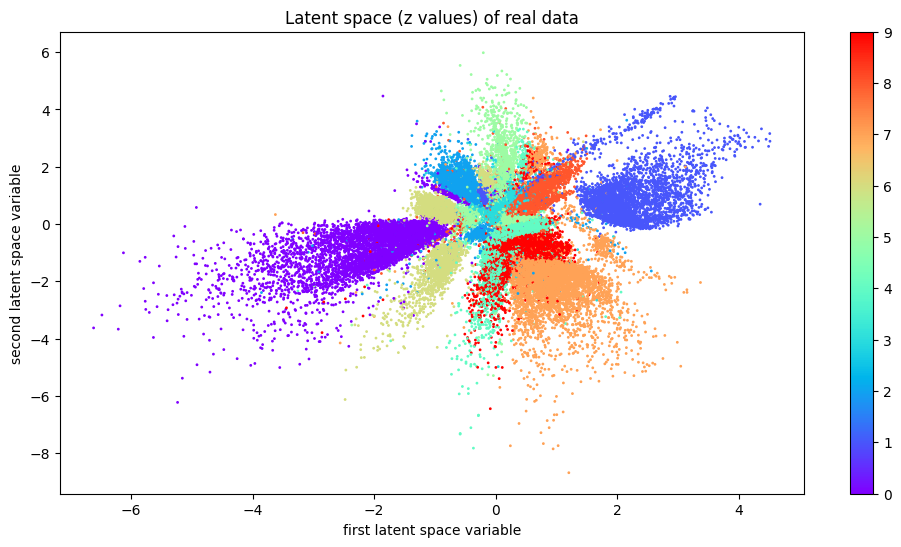

In [7]:
from src.visualization.plot_latent_space_2d_values import plot_latent_space_2d_values
plot_latent_space_2d_values(vae,
                                 x_train,
                                 y_train)

### Predictions from latent space (2d вначале, потом 1d и 3d сделать)

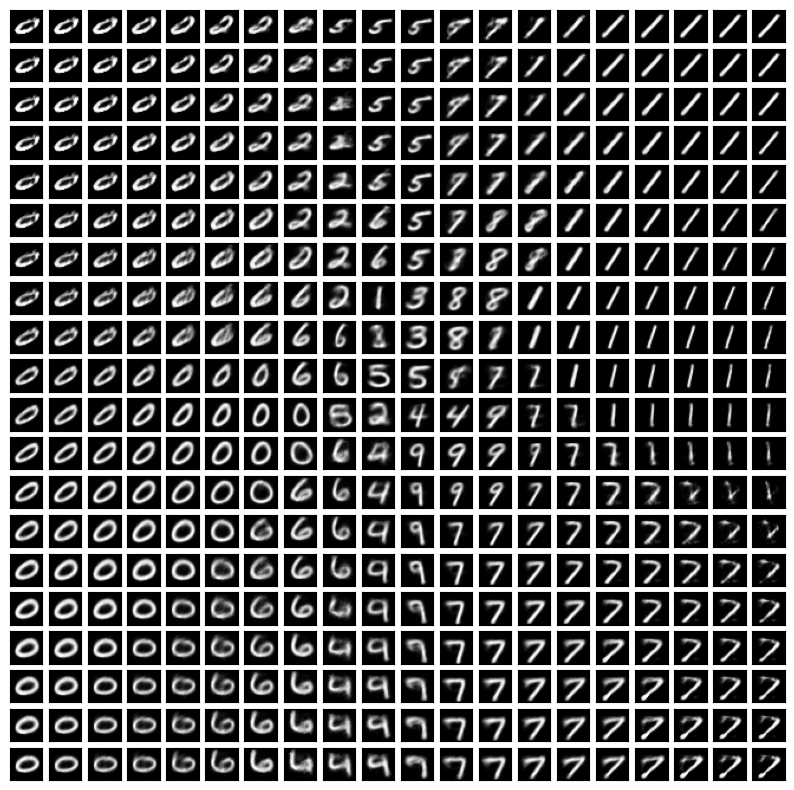

In [8]:
from src.visualization.mnist.plot_predictions_from_2d_latent_space import plot_predictions_from_2d_latent_space
plot_predictions_from_2d_latent_space(vae,
                                      n_cols=20,
                                      xmin=-4,
                                      xmax=4,
                                      ymin=-4,
                                      ymax=4
                                      )